# MINI PROJECT
#### In this project we are going to work with COVID19 dataset, published by *John Hopkins University* and *World  wide happiness* report dataset to identify whether there is any relationship between covid spread with the various factors in latter mentioned data.
 
                                    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### reading the covid data into python

In [2]:
r_data=pd.read_csv('covid19_Confirmed_dataset.csv')
r_data.iloc[:,0:5]

,Province/State,Country/Region,Lat,Long,1/22/20
0,NaN,Afghanistan,33.000000,65.000000,0
1,NaN,Albania,41.153300,20.168300,0
2,NaN,Algeria,28.033900,1.659600,0
3,NaN,Andorra,42.506300,1.521800,0
4,NaN,Angola,-11.202700,17.873900,0
...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0
263,NaN,Yemen,15.552727,48.516388,0
264,NaN,Comoros,-11.645500,43.333300,0


###### Identifying the columns which have no information(Nan)

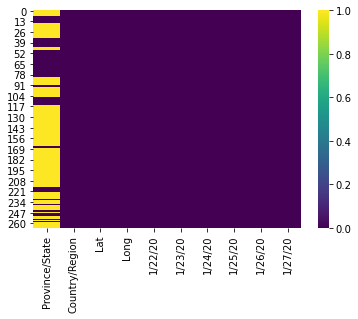

In [3]:
sns.heatmap(r_data.iloc[:,0:10].isnull(),cmap='viridis');

###### Removing unwanted columns

In [4]:
o_data = r_data.drop(['Province/State','Lat','Long'],axis=1)
o_data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 101 entries, Country/Region to 4/30/20
dtypes: int64(100), object(1)
memory usage: 210.0+ KB


###### Grouping the data by Country using sum as aggregate function

In [6]:
n_data=o_data.groupby('Country/Region').sum()
n_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


###### Visualising the pre-processed data for India, China & US countries

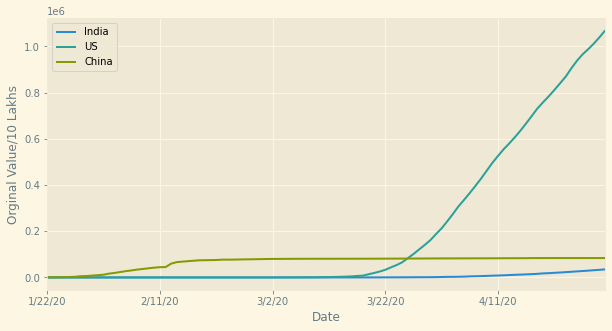

In [7]:
plt.style.use('Solarize_Light2')
n_data.loc['India'].plot.line(figsize=(10,5),label='India').autoscale(axis='x',tight=True)
n_data.loc['US'].plot.line(figsize=(10,5),label='US').autoscale(axis='x',tight=True)
n_data.loc['China'].plot.line(figsize=(10,5),label='China').autoscale(axis='x',tight=True)
plt.ylabel("Orginal Value/10 Lakhs")
plt.xlabel("Date")
plt.legend(loc=2);

From the plot we can infere that, eventhough China exhibits an increase in the number of affected cases at the initial dayas itself,the number of affected people shows exponential increase between the date 3/2/20 and 3/22/20. India also have a gradual increase from 4/11/20.

###### Calculating the maximum ‘Infection Rate’ for each country and store it in a dataframe

In [8]:
infection_rate=n_data.diff()
infection_rate.tail()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,198.0,206.0,212.0,214.0,72.0,72.0,72.0,73.0,74.0,74.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-460.0,-468.0,-474.0,-478.0,-336.0,-336.0,-336.0,-337.0,-338.0,-338.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0,0.0
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,73.0,75.0,83.0,83.0,87.0,87.0,94.0,91.0,100.0
Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-42.0,-46.0,-48.0,-55.0,-53.0,-57.0,-56.0,-63.0,-65.0,-66.0


In [10]:
infection_rate.drop(index='Afghanistan',inplace=True)
infection_rate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-483.0,-542.0,-616.0,-673.0,-751.0,-805.0,-967.0,-1078.0,-1173.0,-1398.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2202.0,2276.0,2344.0,2449.0,2544.0,2656.0,2781.0,2899.0,3082.0,3233.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2094.0,-2187.0,-2284.0,-2396.0,-2518.0,-2644.0,-2774.0,-2906.0,-3105.0,-3261.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-693.0,-698.0,-698.0,-706.0,-713.0,-712.0,-716.0,-716.0,-716.0,-718.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-3.0,-3.0,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,198.0,206.0,212.0,214.0,72.0,72.0,72.0,73.0,74.0,74.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-460.0,-468.0,-474.0,-478.0,-336.0,-336.0,-336.0,-337.0,-338.0,-338.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0,0.0


I removed the index Afghanistan from the data set as it's all elements were Nan which have no use in our project.

###### Calculating the maximum infection rates for the countries China,US,India.

In [11]:
infection_rate.loc[['India','US','China']].max(axis=1)

Country/Region
India     33066.0
US       949220.0
China     80929.0
dtype: float64

###### Creating a specific column named max_inf_rate to store maximum infection rate in each country of the data.

In [12]:
infection_rate['max_inf_rate']=infection_rate.max(axis=1)
infection_rate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_inf_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-542.0,-616.0,-673.0,-751.0,-805.0,-967.0,-1078.0,-1173.0,-1398.0,92.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2276.0,2344.0,2449.0,2544.0,2656.0,2781.0,2899.0,3082.0,3233.0,3233.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2187.0,-2284.0,-2396.0,-2518.0,-2644.0,-2774.0,-2906.0,-3105.0,-3261.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-698.0,-698.0,-706.0,-713.0,-712.0,-716.0,-716.0,-716.0,-718.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-2.0,-3.0,-3.0,-3.0,-3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,206.0,212.0,214.0,72.0,72.0,72.0,73.0,74.0,74.0,214.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-468.0,-474.0,-478.0,-336.0,-336.0,-336.0,-337.0,-338.0,-338.0,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0,0.0,0.0


######  Plotting the Maximum Infection Rate for some countries 

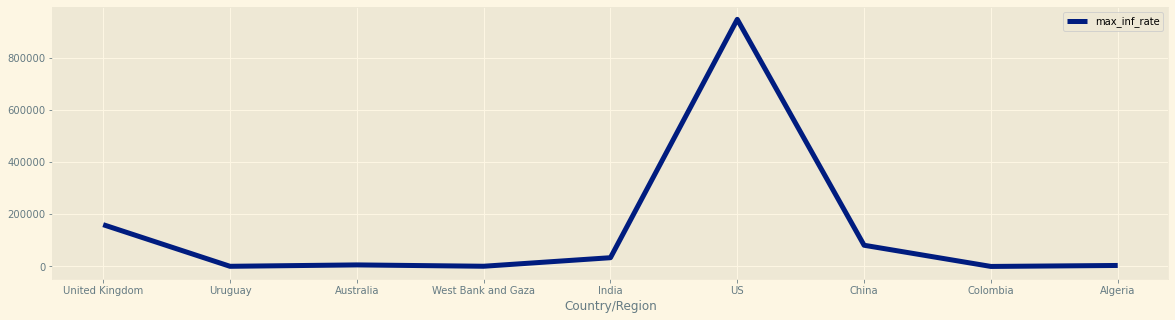

In [13]:
plt.style.use('seaborn-dark-palette')
infection_rate.loc[['United Kingdom', 'Uruguay','Australia','West Bank and Gaza','India','US','China','Colombia','Algeria']].plot.line(y='max_inf_rate',figsize=(20,5),lw=5);

From the graph we can infere that US shows a very high maximum rate than any countries.For the better achievement of our task we may neglect US as the covid rate is very high even if US secured a appreciable rank in happiness report.

###### Creating a data frame which contains only a column containing maximum infection rate.

In [15]:
corona_data=pd.DataFrame(data=infection_rate['max_inf_rate'],index=infection_rate.index)
corona_data

,max_inf_rate
Country/Region,
Albania,92.0
Algeria,3233.0
Andorra,0.0
Angola,0.0
Antigua and Barbuda,7.0
...,...
West Bank and Gaza,214.0
Western Sahara,0.0
Yemen,0.0


###### Reading happiness_report into jupyter

In [17]:
happiness_report=pd.read_csv('Worldwide_happiness_report.csv')
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
happiness_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


###### Indexing the data with country and removing unwanted columns.

In [19]:
happiness_report.set_index('Country or region',inplace=True)
happiness_report.drop(columns=['Overall rank','Score','Perceptions of corruption','Generosity'],inplace=True)

###### Renaming the United States index of data frame to US

In [24]:
happiness_report.rename(index={'United States':'US'},inplace=True)

In [25]:
happiness_report.loc['US']

GDP per capita                  1.433
Social support                  1.457
Healthy life expectancy         0.874
Freedom to make life choices    0.454
Name: US, dtype: float64

In [26]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


###### Creating a dataframe called data which have index present in both the happiness_report and corona_data.

In [27]:
data =pd.DataFrame()
for i in range(0,len(happiness_report)):
    a = happiness_report.index
    if(a[i] in corona_data.index):
        data=data.append(happiness_report.iloc[i])
data


,Freedom to make life choices,GDP per capita,Healthy life expectancy,Social support
Finland,0.596,1.340,0.986,1.587
Denmark,0.592,1.383,0.996,1.573
Norway,0.603,1.488,1.028,1.582
Iceland,0.591,1.380,1.026,1.624
Netherlands,0.557,1.396,0.999,1.522
...,...,...,...,...
Yemen,0.143,0.287,0.463,1.163
Rwanda,0.555,0.359,0.614,0.711
Tanzania,0.417,0.476,0.499,0.885
Central African Republic,0.225,0.026,0.105,0.000


###### Merging with corona_data

In [28]:
for index in data.index:
        data.loc[data.index==index,'max_inf_rate']=corona_data.loc[index][0]
data

,Freedom to make life choices,GDP per capita,Healthy life expectancy,Social support,max_inf_rate
Finland,0.596,1.340,0.986,1.587,4977.0
Denmark,0.592,1.383,0.996,1.573,1674.0
Norway,0.603,1.488,1.028,1.582,6273.0
Iceland,0.591,1.380,1.026,1.624,818.0
Netherlands,0.557,1.396,0.999,1.522,39455.0
...,...,...,...,...,...
Yemen,0.143,0.287,0.463,1.163,0.0
Rwanda,0.555,0.359,0.614,0.711,0.0
Tanzania,0.417,0.476,0.499,0.885,480.0
Central African Republic,0.225,0.026,0.105,0.000,0.0


###### Plotting the different elements in data with maximum infection rate using scatter plot in seaborn.

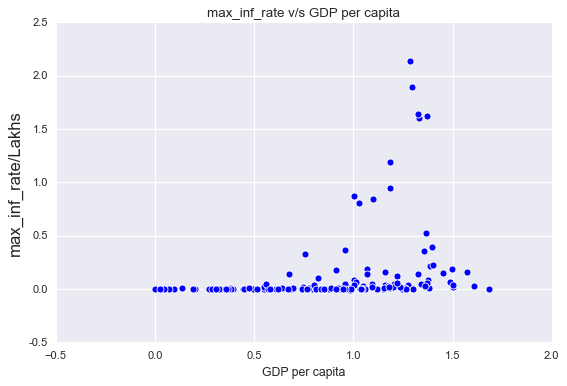

In [51]:
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
plt.title('max_inf_rate v/s GDP per capita',loc='center')
plot=sns.scatterplot(y='max_inf_rate',x='GDP per capita',data=data.drop(index='US'),s=40)
plot.set_xlim=(0.3,1.7)
plt.yticks(plot.get_yticks(),plot.get_yticks()/100000)
plt.ylabel('max_inf_rate/Lakhs',fontsize=15)
plot.set_ylim=(0,2.5)
plt.show(plot);

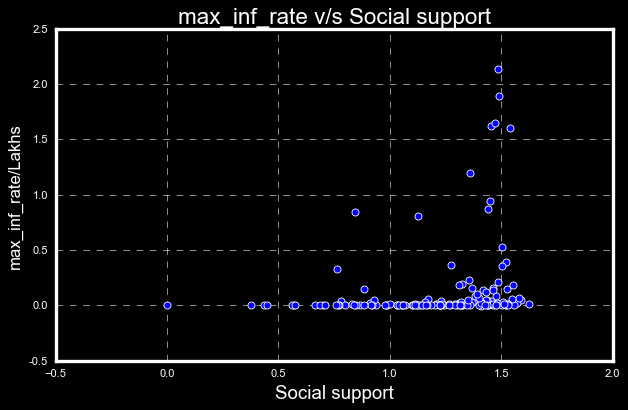

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.title('max_inf_rate v/s Social support',loc='center')
plot=sns.scatterplot(y='max_inf_rate',x='Social support',data=data.drop(index='US'),s=40)
plot.set_xlim=(0,1.7)
plt.yticks(plot.get_yticks(),plot.get_yticks()/100000)
plt.ylabel('max_inf_rate/Lakhs',fontsize=15)
plot.set_ylim=(0,2.5)
plt.show(plot);

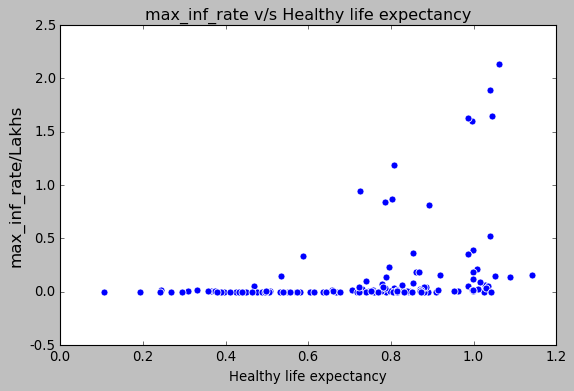

In [50]:
plt.style.use('classic')
plt.figure(figsize=(8,5))
plt.title('max_inf_rate v/s Healthy life expectancy',loc='center')
plot=sns.scatterplot(y='max_inf_rate',x='Healthy life expectancy',data=data.drop(index='US'),s=40)
plot.set_xlim=(0,1.4)
plt.yticks(plot.get_yticks(),plot.get_yticks()/100000)
plt.ylabel('max_inf_rate/Lakhs',fontsize=15)
plot.set_ylim=(0,2.5)
plt.show(plot);

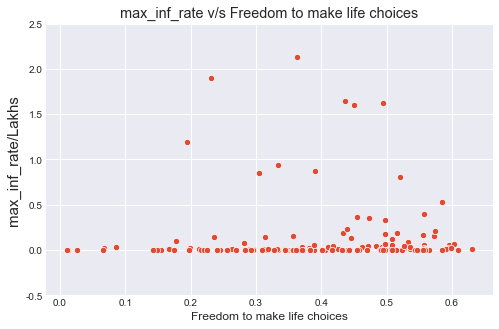

In [42]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,5))
plt.title('max_inf_rate v/s Freedom to make life choices',loc='center')
plot=sns.scatterplot(y='max_inf_rate',x='Freedom to make life choices',data=data.drop(index='US'),s=40)
plot.set_xlim=(0,1)
plt.yticks(plot.get_yticks(),plot.get_yticks()/100000)
plt.ylabel('max_inf_rate/Lakhs',fontsize=15)
plot.set_ylim=(0,2.5)
plt.show(plot);

**Infernce:** From the above plots between covid data and data from happiness_report, we can clearly infere that there is no strong relation between the spread of covid and the increase in GDP,Freedom to make life choices,Healthy life expectancy and social support.That is, the spread of covid is irrespective of how developed a country is or at what facilities that a country offers to their citizens.However,in case of max_inf_rate v/s GDP,Healthy life expectancy and social support,we can see that most of the maximum values in y-axis are plotted for countries with highest values in x-axis.

NB:I dropped 'US' inorder to have a clear understanding between the datas.